# Imbalanced data

CREDIT: This practical was inspired from [this notebook on imbalanced datasets](https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/classification/notebooks/Correcting%20for%20imbalanced%20datasets.ipynb#scrollTo=gvj-ZuWOoO_2).

## Setup
### Imports

In [ ]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
from sklearn.model_selection import train_test_split    # for classification
from sklearn.svm import LinearSVC                       # for classification
from sklearn.metrics import confusion_matrix            # for classification
from sklearn.metrics import accuracy_score              # for classification
import imblearn                                         # for imbalance management
import time                                             # for execution time measurement

### Loading the dataset

In [ ]:
df_recipes_balanced = pd.read_csv("recipes_balanced.csv")
df_recipes = pd.read_csv("recipes.csv")

### Observing the dataset

Using what you have learned in the previous lessons, examine the datasets and see what you can learn about them.

In [ ]:
df_recipes

,cuisine,id,ingredient_list
0,greek,10259,"romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,22213,"water, vegetable oil, wheat, salt"
4,indian,13162,"black pepper, shallots, cornflour, cayenne pep..."
...,...,...,...
39769,irish,29109,"light brown sugar, granulated sugar, butter, w..."
39770,italian,11462,"KRAFT Zesty Italian Dressing, purple onion, br..."
39771,irish,2238,"eggs, citrus fruit, raisins, sourdough starter..."
39772,chinese,41882,"boneless chicken skinless thigh, minced garlic..."


In [ ]:
df_recipes_balanced

,Unnamed: 0,cuisine,id,ingredient_list
0,0,indian,23348,"minced ginger, garlic, oil, coriander powder, ..."
1,1,indian,18869,"chicken, chicken breasts"
2,2,indian,36405,"flour, rose essence, frying oil, powdered milk..."
3,3,indian,11494,"soda, ghee, sugar, khoa, maida flour, milk, oil"
4,4,indian,32675,"tumeric, garam masala, salt, chicken, curry le..."
...,...,...,...,...
5995,5995,moroccan,9788,"ground black pepper, couscous, water, cayenne ..."
5996,5996,french,26911,"cream of tartar, vegetable oil spray, sugar, w..."
5997,5997,southern_us,2098,"sugar, crushed ice, bourbon whiskey, mint spri..."
5998,5998,italian,29985,"fresh basil, large garlic cloves, fettucine, s..."


In [ ]:
print(np.shape(df_recipes))
print(np.shape(df_recipes_balanced))

(39774, 3)
(6000, 4)


**Comment**

The observations in these datasets are recipes. "df_recipes" and "df_recipes_balanced" contain respectively 39 774 and 6000 of them. For each observation, there is the nationality of the recipe and a list of ingredients.


## Classification task

The goal with these datasets will be to detect which recipes are Indian.


### Data Labeling
For each dataset, add a column named `is_indian`, indicating whether the recipe is indian (1) or not (0).
The labeling should be done in place, meaning that we should keep the same dataframes instead of creating new ones.

In [ ]:
L_unbalanced = df_recipes['cuisine'] == 'indian'
df_recipes['is_indian'] = L_unbalanced
df_recipes['is_indian'] = df_recipes['is_indian'].replace([False], 0)
df_recipes['is_indian'] = df_recipes['is_indian'].replace([True], 1)

L_balanced = df_recipes_balanced['cuisine'] == 'indian'
df_recipes_balanced['is_indian'] = L_balanced
df_recipes_balanced['is_indian'] = df_recipes_balanced['is_indian'].replace([False], 0)
df_recipes_balanced['is_indian'] = df_recipes_balanced['is_indian'].replace([True], 1)


In [ ]:
df_recipes

,cuisine,id,ingredient_list,is_indian
0,greek,10259,"romaine lettuce, black olives, grape tomatoes,...",0
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, gr...",0
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, gr...",0
3,indian,22213,"water, vegetable oil, wheat, salt",1
4,indian,13162,"black pepper, shallots, cornflour, cayenne pep...",1
...,...,...,...,...
39769,irish,29109,"light brown sugar, granulated sugar, butter, w...",0
39770,italian,11462,"KRAFT Zesty Italian Dressing, purple onion, br...",0
39771,irish,2238,"eggs, citrus fruit, raisins, sourdough starter...",0
39772,chinese,41882,"boneless chicken skinless thigh, minced garlic...",0


In [ ]:
df_recipes_balanced

,Unnamed: 0,cuisine,id,ingredient_list,is_indian
0,0,indian,23348,"minced ginger, garlic, oil, coriander powder, ...",1
1,1,indian,18869,"chicken, chicken breasts",1
2,2,indian,36405,"flour, rose essence, frying oil, powdered milk...",1
3,3,indian,11494,"soda, ghee, sugar, khoa, maida flour, milk, oil",1
4,4,indian,32675,"tumeric, garam masala, salt, chicken, curry le...",1
...,...,...,...,...,...
5995,5995,moroccan,9788,"ground black pepper, couscous, water, cayenne ...",0
5996,5996,french,26911,"cream of tartar, vegetable oil spray, sugar, w...",0
5997,5997,southern_us,2098,"sugar, crushed ice, bourbon whiskey, mint spri...",0
5998,5998,italian,29985,"fresh basil, large garlic cloves, fettucine, s...",0


### Observing the classes

1. For both datasets, compare the number of examples for each class. What do you notice?
2. Use an appropriate graph to display your observations.
3. What problem(s) can this cause for our classification task?

**Answers**

1. "df_recipes_balanced" is perfectly balanced but "df_recipes" is not, with a ratio greater than 10 to 1 in favor of the negative class (cf. code below).
2. A countplot allows to visualize the imbalance.
3. A strongly imbalanced dataset like "df_recipes" should not be fed raw into a classifier. Otherwise, the classifier could achieve a great accuracy by predicting the more represented class without even considerng the input.

In [ ]:
print(df_recipes["is_indian"].value_counts())
print(df_recipes_balanced["is_indian"].value_counts())

0    36771
1     3003
Name: is_indian, dtype: int64
1    3000
0    3000
Name: is_indian, dtype: int64


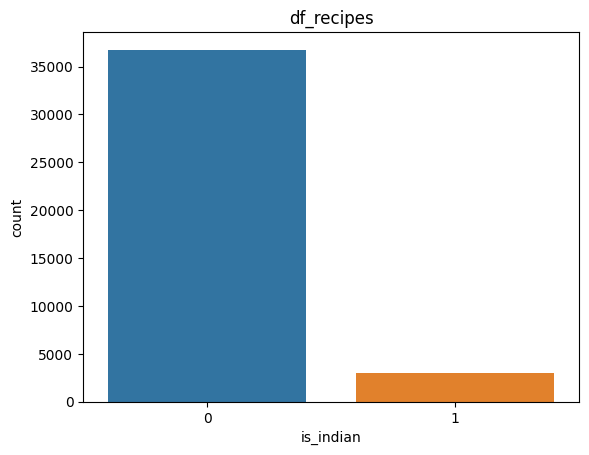

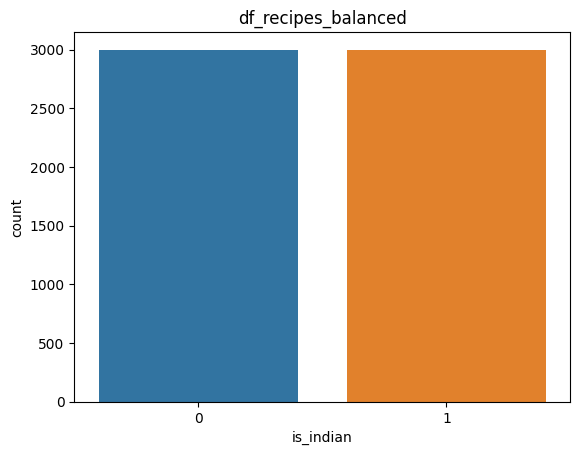

In [ ]:
sns.countplot(x='is_indian', data=df_recipes, )
plt.title("df_recipes")
plt.show()
sns.countplot(x='is_indian', data=df_recipes_balanced, )
plt.title("df_recipes_balanced")
plt.show()

### Baseline test
#### Data preparation
In order to perform the classification, we first need to convert the ingredient lists into vectors. For this, we will use a TF-IDF vectorizer. Details about this vectorizer, and more insights on how to work with text will be given in the dedicated practical. For now, just use it as is!

*NB: We should use the vectorizer after the train-test split, but we will overlook this issue in this practical.*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer for each dataset and train it
vectorizer_balanced = TfidfVectorizer()
ingredients_balanced = vectorizer_balanced.fit_transform(df_recipes_balanced.ingredient_list).toarray()

vectorizer = TfidfVectorizer()
ingredients = vectorizer.fit_transform(df_recipes.ingredient_list).toarray()

# In the classification task, the features X are the ingredients, and the label y is whether the recipe is Indian
X_balanced = ingredients_balanced
y_balanced = df_recipes_balanced.is_indian

X = ingredients
y = df_recipes.is_indian

In [ ]:
# Split the data into train and test sets
X_train_balanced,  X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, random_state=42, stratify=y_balanced)
X_train,  X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

**Question :** In the above cell, what does the "stratify" parameter do in the train-test split?

**Answer :** "Stratify" forces the split to keep the same proportion of a certain character (in this instance : the class) in the training and the testing set, equal to the proportion of this character in the original dataset.

#### Baseline classification

For this first test, we will use a linear classifier called LinearSVC.

In [ ]:
def classify(input_train, input_test, label_train, label_test):
    classifier = LinearSVC(random_state=42)
    classifier.fit(input_train, label_train)

    label_predicted = classifier.predict(input_test)
    label_true = label_test

    classification_confusion_matrix = confusion_matrix(label_true, label_predicted)
    label_names = pd.Series(['not indian', 'indian'])

    print(f"Accuracy:{accuracy_score(label_true, label_predicted)}")
    return pd.DataFrame(classification_confusion_matrix,
                 columns='Predicted ' + label_names,
                 index='Is ' + label_names)\
        .div(classification_confusion_matrix.sum(axis=1), axis=0) # converts the numbers into percentages


In [ ]:
# Test on the balanced dataset
classify(X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced)

Accuracy:0.9413333333333334


,Predicted not indian,Predicted indian
Is not indian,0.954667,0.045333
Is indian,0.072000,0.928000


In [ ]:
# Test on the imbalanced dataset
classify(X_train, X_test, y_train, y_test)

Accuracy:0.9798873692679002


,Predicted not indian,Predicted indian
Is not indian,0.993038,0.006962
Is indian,0.181092,0.818908


#### Questions
1. The matrices shown above are called "confusion matrices". Describe what they contain.
2. What do you think is the advantage of using a confusion matrix over using accuracy alone?
3. Compare the results obtained with the balanced dataset and with the imbalanced dataset. What are the main differences?
4. How do you interpret these differences?

**Answers**

1. The "confusion matrices" display the rate of correct classification per class.

2. In imbalanced datasets, a trained algorithm can have a great accuracy in spite of beig really bad at classifying correctly instances of the minority class. The "confusion matrices" gives a more detailed overview of the algorithm tendency and helps spot if instances of the minority class are well classified.

3. The algorithm trained with the imbalanced dataset has a better accuracy (98% versus 94%), it recognises the non-indian recipes better than the algorithm trained with the balanced dataset (99% versus 95%), however, it has a way worse recognition rate for the indian recipes (82% vs 93%).

4. "df_recipes" is so imbalanced that the algorithm can predict a recipe is indian when it is not without affecting the global accuracy too much. With an inbalanced testing set, the classifier trained on imbalanced data outperforms the classifier trained and and tested on the balanced dataset. However, if we tested on a balanced set the classifier trained on imbalanced data, its performance would be lower than 94%.

## Managing the imbalance

### Undersampling and oversampling

In this section, we will use 3 different resampling techniques: random undersampling, random oversampling, and SMOTE. We will only need the `df_recipes` dataframe (the balanced dataframe will not be used anymore).
For each of those three techniques, answer the following questions:
1. Using your knowledge and [`imblearn`'s documentation](https://imbalanced-learn.org/stable/references/index.html), explain the principle of the algorithm.
2. Import and instantiate the resampler.
3. Use it to resample the data. On what part of the data should you use the resampler?
4. Observe and comment on the resampling of the classes.
5. Use the `classify` function from earlier to observe the influence of the resampling on classification.
6. Comment on your results.

#### Random undersampling

**Answers**

- RandomUnderSampler is an undersampling algorithm. It randomly selects an observation from the majority class, delete it, and do this again until the classes are balanced.
- Using this method, the global accuracy drop from 98% to 96%. However, the ability of the algorithm to correctly detect observations from the minority class surged from 82% to 95%. This model could now maintain its performance level no matter the imbalance of the testing set.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state = 42)
X_train_rus, y_train_rus = undersampler.fit_resample(X_train, y_train)

classify(X_train_rus, X_test, y_train_rus, y_test)

Accuracy:0.9607803700724055


,Predicted not indian,Predicted indian
Is not indian,0.961384,0.038616
Is indian,0.046605,0.953395


#### Random oversampling

**Answers**

- RandomOverSampler is an oversampling algorithm. It randomly selects an observation from the minority class, duplicate it, and do this again until the classes are balanced.
- Using this method, the global accuracy drop from 98% to 97%. However, the ability of the algoirthm to detect each class is still asymmetric (97% for indians and 92% for non indians). On a balanced testing set, this algorithm would perform better than the one trained on the imbalanced set but it would not perform as well as the alogrithm trained with on the undersampled test.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state = 42)
X_train_ros, y_train_ros = oversampler.fit_resample(X_train, y_train)

classify(X_train_ros, X_test, y_train_ros, y_test)

Accuracy:0.9687248592115849


,Predicted not indian,Predicted indian
Is not indian,0.972805,0.027195
Is indian,0.081225,0.918775


#### SMOTE

**Answers**

- SMOTE is an oversampling algorithm. It randomly selects an observation from the minority class, randomly selects one of his k nearest neighbours, randomly generate a floating number between 0 and 1 and creates a new observation with feature values between the selected observation and the selected neighbour, the randomly generated number decides how close the characteristics of the created observation will be to the selected observation, relative to the selected neighbour.
- Results with this method are close to the random oversampling ones. The ability of the classifier trained with SMOTE to detect each class is even more asymmetric than with random oversampling (but still less than with no treatment at all).

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

classify(X_train_smote, X_test, y_train_smote, y_test)

Accuracy:0.9713395012067578


,Predicted not indian,Predicted indian
Is not indian,0.976504,0.023496
Is indian,0.091877,0.908123


**Conclusion**

On this dataset, random undersampling works better than the two other oversampling methods tested. This dataset contains many observations but also a significant class imbalance. The size of the dataset maybe explains why the undersampling method works best, as the model still has enough observations to learn from, whereas oversampling methods might introduce too much noise on the minority class coupled with overfitting.